#CARLOS LEONEL GUERRERO RODRIGUEZ
#PROYECTO PARCIAL



Procedure:     Nonlinear Least Squares Regression

Description:   These data are the result of a NIST study involving
               quantum defects in iodine atoms.  The response
               variable is the number of quantum defects, and the
               predictor variable is the excited energy state.
               The argument to the ARCTAN function is in radians.

DataSet https://itl.nist.gov/div898/strd/nls/data/roszman1.shtmlReference:     Roszman, L., NIST (19??).  
               Quantum Defects for Sulfur I Atom.


In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Especifica la ruta de tu archivo Excel
file_path = "/content/Datos ML.xlsx"
# Carga el archivo Excel en un DataFrame
df = pd.read_excel(file_path)
# Asigna los datos de la columna A a la variable x
x = df['y']
# Asigna los datos de la columna B a la variable y
y = df['x']
x,y

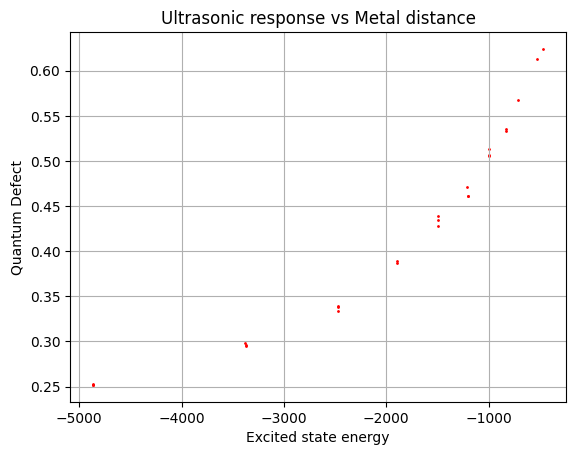

In [62]:
plt.scatter(x,y, c='red',s=1)
plt.grid(True)
plt.xlabel("Excited state energy")
plt.ylabel("Quantum Defect")
plt.title("Excited state energy vs Quantum Defect")
plt.show()

En este modelo, la variable dependiente y se modela como una función no lineal de los parámetros $b1, b2, b3, b4$ y la variable independiente $x$. La función arco tangente y la división por pi son características que hacen que este modelo sea no lineal.

Este tipo de modelo se puede utilizar en diversas aplicaciones, dependiendo del contexto del problema. Por ejemplo, puede ser útil en ciertos tipos de análisis de series temporales, modelado de crecimiento biológico, o cualquier situación donde la relación entre $y$ y $x$ no pueda ser adecuadamente capturada por un modelo lineal.

$y = b_1 - b_2x - \frac{\arctan\left(\frac{b_3}{x - b_4}\right)}{\pi}$




In [222]:
# Define el modelo
def model(x, theta):
    w_0, w_1, w_2, w_3 = theta
    return w_0 - w_1 * x - np.arctan(w_2 / (x - w_3)) / np.pi

# Define la función de prior
def prior(theta):
    theta_min = [-10, 10, 10, 10]
    theta_max = [10, 10, 10, -10]
    return all(theta_min[i] < theta[i] < theta_max[i] for i in range(len(theta)))

# Define la función de verosimilitud
def likelihood(x, y, sigma, theta):
    return -0.5 * np.sum((y - model(x, theta))**2 / sigma**2)

# Define la función del posterior
def posterior(x, y, sigma, theta):
    if prior(theta):
        return likelihood(x, y, sigma, theta)
    else:
        return -np.inf  # log(0)

# Define la función de propuesta
def proposal(theta, sigma_prop):
    return [np.random.normal(theta[i], sigma_prop) for i in range(len(theta))]

1.- Define an initial value of the free parameters.
$theta = [w_0,w_1,w_2,w_3]$

prior(theta):
    theta_min = [-1, -1]  # Define los límites para los parámetros
    theta_max = [1, 1]

2.- Draw a new random sample of the free parameters from a gaussian distribution centered at the initial values, and with a predefined dispersion.



$\theta_{\text{prop}} = \left[\text{gaussian}(\theta_{\text{inicial}[0]}, \sigma), \text{gaussian}(\theta_{\text{inicial}[1]}, \sigma)\right]$

3.- Evaluate the (logarithm) posterior of the initial parameters and that of the proposed parameters and compare them



$\ln \text{Post}(\theta_{\text{inicial}}), \ln \text{Post}(\theta_{\text{prop}})$

   -if the (logarithm) posterior of the proposal is
     higher than the (logarithm) posterior of the
     initial parameters accept the proposal and
     save it.

           If ln Post(theta_prop) > ln Post(theta_inicial)
              accept theta_prop
              save theta_prop
              theta_inicial = theta_prop

   -if the (logarithm) posterior of the proposal is
    lower than the (logarithm) posterior of the
    initial parameters then generate a random
    number between cero and one, if the ratio of
    the (logarithm) posterior of the proposal and
    the initial parameter is larger than such
    number then you accept the proposal and
    save it, if not you discard the proposal and
    keep the initial value
             
           Else If
                Ptest = uniform (0,1)
               If
                 (ln Post(theta_prop) - ln Post(theta_inicial) > ln (Ptest):
                       accept theta_prop    
                       save theta_prop
                       theta_inicial = tehta_prop
               Else if
                   theta_inicial = theta_inicial

4.- If the proposal was accepted, replace the initial value by such proposal, if not keep the initial sample and repeat step 3

After many steps, look at the resultant distribution (the chains) of parameter, i.e., the likelihood/posterior

In [223]:


# Inicializa los parámetros
theta_initial = [0.2, -0.000005 , 1200, -150]
sigma_prop = 0.0000001

# Realiza el muestreo MCMC
# Realiza el muestreo MCMC
n_steps = 10000
chain = [theta_initial]
for i in range(n_steps):
    theta_prop = proposal(chain[-1], sigma_prop)
    log_posterior_initial = posterior(x, y, sigma, chain[-1])
    log_posterior_prop = posterior(x, y, sigma, theta_prop)

    if log_posterior_prop > log_posterior_initial:
        chain.append(theta_prop)
    else:
        p_accept = np.exp(log_posterior_prop - log_posterior_initial)
        if np.random.rand() < p_accept:
            chain.append(theta_prop)
        else:
            chain.append(chain[-1])

    # Actualiza los valores de los parámetros en cada paso
    chain[-1] = theta_prop

    # Imprime los valores de los parámetros en cada paso
    print(f"Step {i}: w_0 = {chain[-1][0]}, w_1 = {chain[-1][1]}, w_2 = {chain[-1][2]}, w_3 = {chain[-1][3]}")


Streaming output truncated to the last 5000 lines.
Step 5000: w_0 = 0.20000671086762561, w_1 = 3.3449727375773386e-07, w_2 = 1200.000012948526, w_3 = -149.99999797535816
Step 5001: w_0 = 0.20000674075312272, w_1 = 2.9114652571458315e-07, w_2 = 1200.0000132741018, w_3 = -149.99999801920495
Step 5002: w_0 = 0.20000661339694575, w_1 = 4.4820450825778193e-07, w_2 = 1200.0000132181947, w_3 = -149.9999981474425
Step 5003: w_0 = 0.20000665118101307, w_1 = 2.0183227893392906e-07, w_2 = 1200.000013090159, w_3 = -149.99999816282303
Step 5004: w_0 = 0.20000695156890172, w_1 = 1.172106373181698e-07, w_2 = 1200.0000132090493, w_3 = -149.9999982112108
Step 5005: w_0 = 0.2000069108700534, w_1 = 1.0268126169159921e-09, w_2 = 1200.0000132437074, w_3 = -149.9999982011512
Step 5006: w_0 = 0.20000697558574176, w_1 = 1.8705101988437375e-08, w_2 = 1200.0000132279254, w_3 = -149.9999981831226
Step 5007: w_0 = 0.20000713880476145, w_1 = -6.33116731928998e-08, w_2 = 1200.000013263705, w_3 = -149.99999827208842

In [227]:
# Tomar los parámetros finales del último paso de la cadena
final_theta = chain[-1]
final_theta

[0.19999719518517795,
 -8.132709315039963e-06,
 1200.000011731759,
 -150.00000565345584]

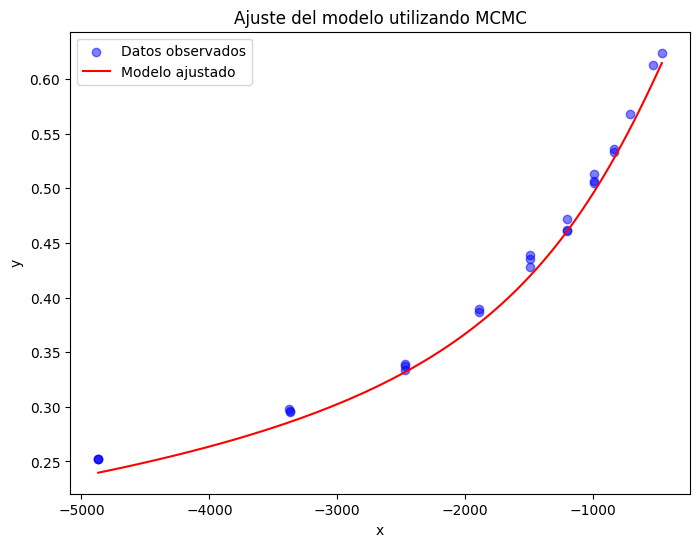

In [228]:


# Crear una serie de puntos de 'x' para el gráfico
x_plot = np.linspace(min(x), max(x), 100)

# Calcular los valores del modelo con los parámetros finales
y_model = model(x_plot, final_theta)

# Graficar los datos observados y el modelo ajustado
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados", color="blue", alpha=0.5)
plt.plot(x_plot, y_model, label="Modelo ajustado", color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste del modelo utilizando MCMC')
plt.show()

Distribución de los parámetros: Cada histograma muestra la distribución de los valores obtenidos para un parámetro específico a lo largo de la cadena MCMC. Si la cadena MCMC ha convergido, esta distribución debería aproximarse a la distribución posterior del parámetro.

Priors planos: Los priors planos indican que todos los valores posibles del parámetro son igualmente probables a priori

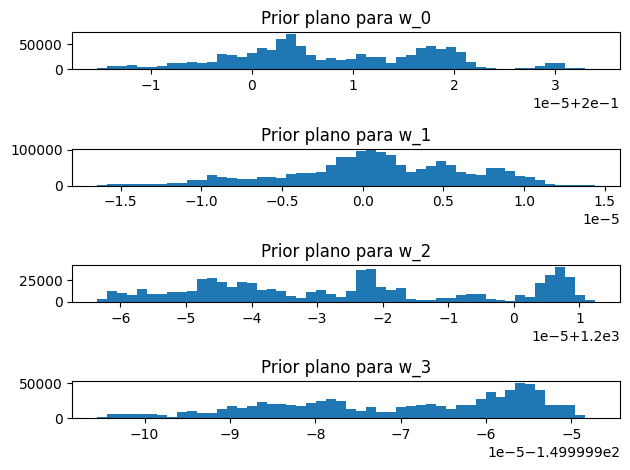

In [177]:

# Extrae las cadenas para cada parámetro
w_0_chain = [theta[0] for theta in chain]
w_1_chain = [theta[1] for theta in chain]
w_2_chain = [theta[2] for theta in chain]
w_3_chain = [theta[3] for theta in chain]

# Crea una figura con 4 subgráficos
fig, axs = plt.subplots(4)

# Grafica el histograma para w_0
axs[0].hist(w_0_chain, bins=50, density=True)
axs[0].set_title('Prior plano para w_0')

# Grafica el histograma para w_1
axs[1].hist(w_1_chain, bins=50, density=True)
axs[1].set_title('Prior plano para w_1')

# Grafica el histograma para w_2
axs[2].hist(w_2_chain, bins=50, density=True)
axs[2].set_title('Prior plano para w_2')

# Grafica el histograma para w_3
axs[3].hist(w_3_chain, bins=50, density=True)
axs[3].set_title('Prior plano para w_3')

# Muestra la figura
plt.tight_layout()
plt.show()



Primero, especifico que quiero ejecutar 3 cadenas independientes (n_chains) para explorar el espacio de parámetros.

Luego, creo una lista llamada chains que contendrá las muestras de cada cadena. Inicializo cada cadena con un conjunto de parámetros iniciales (theta_initial).

Después, entro en un bucle principal que se ejecutará un número específico de veces (n_steps). Este bucle representa el proceso de muestreo MCMC.

Dentro del bucle principal, hay otro bucle anidado que itera a través de cada una de las cadenas (j). En cada paso del bucle, se realizan los siguientes pasos:

a. Se genera una propuesta para los parámetros (theta_prop) basada en el valor actual de los parámetros en la cadena.

b. Se calcula el logaritmo del posterior inicial (log_posterior_initial) y el logaritmo del posterior para la propuesta (log_posterior_prop) utilizando los datos observados (x, y), la desviación estándar (sigma) y los valores de los parámetros.

c. Se compara el logaritmo del posterior de la propuesta con el logaritmo del posterior inicial. Si el logaritmo del posterior de la propuesta es mayor, la propuesta se acepta y se agrega a la cadena.

d. Si el logaritmo del posterior de la propuesta no es mayor, se calcula la probabilidad de aceptación (p_accept) y se compara con un número aleatorio. Si el número aleatorio es menor que la probabilidad de aceptación, se acepta la propuesta; de lo contrario, se mantiene el valor actual en la cadena.

e. Luego, se actualizan los valores de los parámetros en la cadena con el valor de la propuesta aceptada o el valor actual, dependiendo de si se acepta la propuesta o no.

f. Finalmente, se imprime el estado actual de los parámetros en cada cadena en este paso.

Después de ejecutar todas las iteraciones, el código grafica las cadenas para cada parámetro en subgráficos separados. Cada cadena se representa con una línea en el gráfico, y se muestran las cuatro dimensiones de los parámetros (w_0, w_1, w_2, w_3) en subgráficos separados.

Streaming output truncated to the last 5000 lines.
Cadena 3, Paso 11875: w_0 = 0.19998898151835082, w_1 = -4.4316803763214035e-06, w_2 = 1200.0000064781107, w_3 = -149.9999832732976
Cadena 1, Paso 11876: w_0 = 0.19999828034350675, w_1 = -2.9941412799804285e-06, w_2 = 1200.0000169207015, w_3 = -150.00000382722843
Cadena 2, Paso 11876: w_0 = 0.19998422014013484, w_1 = -1.7489020560402703e-05, w_2 = 1199.9999984226993, w_3 = -150.000004488986
Cadena 3, Paso 11876: w_0 = 0.19998916866117128, w_1 = -4.48436936302471e-06, w_2 = 1200.0000063590292, w_3 = -149.99998330158633
Cadena 1, Paso 11877: w_0 = 0.1999982171014837, w_1 = -3.1694567862026755e-06, w_2 = 1200.0000169570287, w_3 = -150.00000384503443
Cadena 2, Paso 11877: w_0 = 0.19998417514307362, w_1 = -1.7566536842414846e-05, w_2 = 1199.9999983030195, w_3 = -150.00000445792313
Cadena 3, Paso 11877: w_0 = 0.1999891528354406, w_1 = -4.4678252451009644e-06, w_2 = 1200.0000063475736, w_3 = -149.99998311913654
Cadena 1, Paso 11878: w_0 = 0.19

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Cadena 2, Paso 27390: w_0 = 0.19996625418471356, w_1 = -3.119939022011375e-05, w_2 = 1200.0000039512424, w_3 = -150.0000013581885
Cadena 3, Paso 27390: w_0 = 0.19998721149183174, w_1 = -1.788291348729983e-06, w_2 = 1200.0000034764562, w_3 = -149.999987148051
Cadena 1, Paso 27391: w_0 = 0.1999875184230372, w_1 = -3.122857230409607e-06, w_2 = 1200.0000181915923, w_3 = -149.9999961216967
Cadena 2, Paso 27391: w_0 = 0.1999661843498554, w_1 = -3.1065593022066066e-05, w_2 = 1200.0000038435173, w_3 = -150.00000157198545
Cadena 3, Paso 27391: w_0 = 0.1999872364161155, w_1 = -1.890654406916535e-06, w_2 = 1200.0000034528548, w_3 = -149.99998719018924
Cadena 1, Paso 27392: w_0 = 0.1999875817707177, w_1 = -2.996869806474546e-06, w_2 = 1200.0000181124606, w_3 = -149.99999624065555
Cadena 2, Paso 27392: w_0 = 0.19996619203959845, w_1 = -3.1159802356406234e-05, w_2 = 1200.000003890225, w_3 = -150.00000148207118
Cadena 3, Paso 27392: w_0 = 0.199987393

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Cadena 1, Paso 66465: w_0 = 0.19999817191436442, w_1 = 1.08276570301937e-05, w_2 = 1200.0000429330867, w_3 = -150.00001128664104
Cadena 2, Paso 66465: w_0 = 0.19996874813630422, w_1 = 3.554822307750939e-06, w_2 = 1200.0000411799253, w_3 = -149.99997906059218
Cadena 3, Paso 66465: w_0 = 0.2000264571463536, w_1 = -5.603838276077598e-06, w_2 = 1200.0000071900672, w_3 = -149.99999919639822
Cadena 1, Paso 66466: w_0 = 0.199998098559567, w_1 = 1.0818104744277964e-05, w_2 = 1200.0000427827697, w_3 = -150.00001133078186
Cadena 2, Paso 66466: w_0 = 0.1999687468402487, w_1 = 3.624109593671336e-06, w_2 = 1200.0000411993003, w_3 = -149.99997911867794
Cadena 3, Paso 66466: w_0 = 0.20002647478505853, w_1 = -5.649163362277665e-06, w_2 = 1200.0000070862168, w_3 = -149.99999907037227
Cadena 1, Paso 66467: w_0 = 0.1999981740025258, w_1 = 1.0689625926167619e-05, w_2 = 1200.00004288122, w_3 = -150.00001124567459
Cadena 2, Paso 66467: w_0 = 0.1999686362623

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Cadena 3, Paso 90350: w_0 = 0.20002353097219122, w_1 = 1.851267830098612e-05, w_2 = 1200.0000355151021, w_3 = -149.99999334459338
Cadena 1, Paso 90351: w_0 = 0.2000083986425907, w_1 = 3.866673489443424e-05, w_2 = 1200.0000353049104, w_3 = -150.00002993026445
Cadena 2, Paso 90351: w_0 = 0.19996010437343784, w_1 = -8.443152810137316e-06, w_2 = 1200.000038176719, w_3 = -149.99999658340624
Cadena 3, Paso 90351: w_0 = 0.2000235461449618, w_1 = 1.8744369825557055e-05, w_2 = 1200.0000354335564, w_3 = -149.99999331071848
Cadena 1, Paso 90352: w_0 = 0.20000852605400427, w_1 = 3.839632913179023e-05, w_2 = 1200.000035308843, w_3 = -150.00002993159347
Cadena 2, Paso 90352: w_0 = 0.1999600826206988, w_1 = -8.546359188106993e-06, w_2 = 1200.0000381644072, w_3 = -149.99999640450793
Cadena 3, Paso 90352: w_0 = 0.20002372042619534, w_1 = 1.8687015179184836e-05, w_2 = 1200.000035249124, w_3 = -149.99999332825632
Cadena 1, Paso 90353: w_0 = 0.20000867772

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Cadena 2, Paso 98333: w_0 = 0.19995218712458646, w_1 = -5.766991188935025e-06, w_2 = 1200.000032216393, w_3 = -149.99999623431162
Cadena 3, Paso 98333: w_0 = 0.20001547519766957, w_1 = 7.1553113164198885e-06, w_2 = 1200.000022379819, w_3 = -149.99997801948794
Cadena 1, Paso 98334: w_0 = 0.20002114010342043, w_1 = 3.131135229651016e-05, w_2 = 1200.0000312483176, w_3 = -150.00003029997612
Cadena 2, Paso 98334: w_0 = 0.1999523675195674, w_1 = -5.679413511002895e-06, w_2 = 1200.0000320792349, w_3 = -149.9999962346281
Cadena 3, Paso 98334: w_0 = 0.20001547915454523, w_1 = 7.317841446062115e-06, w_2 = 1200.0000223311895, w_3 = -149.99997793945053
Cadena 1, Paso 98335: w_0 = 0.20002105687887525, w_1 = 3.1397561524797164e-05, w_2 = 1200.0000311596873, w_3 = -150.00003032464363
Cadena 2, Paso 98335: w_0 = 0.19995230473634132, w_1 = -5.667829861622785e-06, w_2 = 1200.0000320991699, w_3 = -149.99999609788264
Cadena 3, Paso 98335: w_0 = 0.20001547

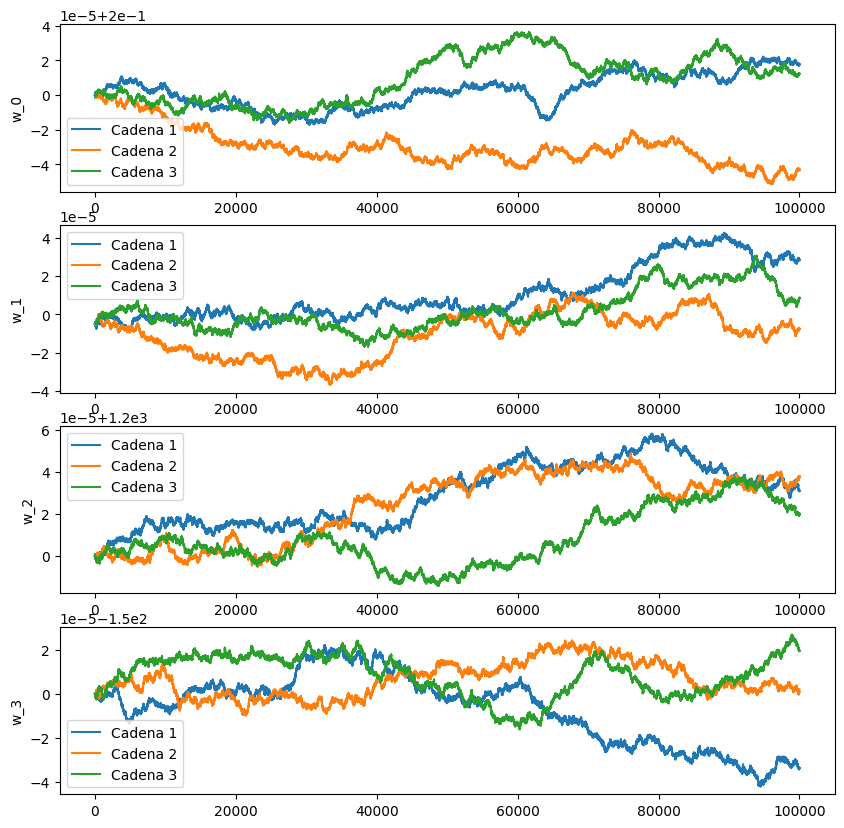

In [204]:

n_chains = 3
chains = [[theta_initial] for _ in range(n_chains)]  # Cada cadena es una lista de listas
for i in range(n_steps):
    for j in range(n_chains):
        theta_prop = proposal(chains[j][-1], sigma_prop)
        log_posterior_initial = posterior(x, y, sigma, chains[j][-1])
        log_posterior_prop = posterior(x, y, sigma, theta_prop)

        if log_posterior_prop > log_posterior_initial:
            chains[j].append(theta_prop)
        else:
            p_accept = np.exp(log_posterior_prop - log_posterior_initial)
            if np.random.rand() < p_accept:
                chains[j].append(theta_prop)
            else:
                chains[j].append(chains[j][-1])

        # Actualiza los valores de los parámetros en cada paso
        chains[j][-1] = theta_prop

        # Imprime los valores de los parámetros en cada paso
        print(f"Cadena {j+1}, Paso {i}: w_0 = {chains[j][-1][0]}, w_1 = {chains[j][-1][1]}, w_2 = {chains[j][-1][2]}, w_3 = {chains[j][-1][3]}")

# Grafica las cadenas para cada parámetro
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
labels = ['w_0', 'w_1', 'w_2', 'w_3']
for i in range(4):
    for j in range(n_chains):
        axs[i].plot([chain[i] for chain in chains[j]], label=f'Cadena {j+1}')
    axs[i].set_ylabel(labels[i])
    axs[i].legend()
plt.show()


Las gráficas generadas por el código muestran la evolución de los valores de los parámetros w_0, w_1, w_2 y w_3 a lo largo de las iteraciones del algoritmo MCMC para cada una de las tres cadenas.

Mezcla de las cadenas: Las líneas correspondientes a las tres cadenas deberían entrelazarse entre sí, lo que indica que las cadenas están explorando la misma región del espacio de parámetros.

Convergencia: Después de un cierto número de pasos, las líneas deberían parecer ruido aleatorio alrededor de un valor constante. Esto indica que las cadenas han convergido a la distribución objetivo.